# Social information capture following Bagrow's paper: Visualisation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import pickle

In [3]:
# read picle file
pickle_in = open("user_info.pickle", "rb")
user_info = pickle.load(pickle_in)

In [4]:
user_details = pd.DataFrame.from_dict(user_info, orient='index',
                       columns=['NumPlaceid','NumUniqPlaceid', 'NumFriends',
                                'ShannonEntropy', 'entropy', 
                                'ego predictability', 'ego+alters entropy', 'alters entropy',
                                'ego+alters predictability', 'alters predictability'])

In [5]:
user_details

,NumPlaceid,NumUniqPlaceid,NumFriends,ShannonEntropy,entropy,ego predictability,ego+alters entropy,alters entropy,ego+alters predictability,alters predictability
eric-pakurar,490,161,6,5.436017,4.174407,0.527459,3.947835,6.808230,0.661459,0.341607
sean-weller,427,250,4,7.271467,5.875851,0.516850,4.813549,5.294403,0.562125,0.508329
david-mckinney,353,105,4,4.980373,2.319584,0.501224,2.754077,10.230040,0.767017,-0.227473
uwe-r,297,97,7,5.348942,4.272597,0.485968,4.942620,9.526083,0.519611,-0.176695
markus-windisch,310,126,7,5.196615,4.247680,0.489854,4.216728,4.653284,0.607075,0.557184
...,...,...,...,...,...,...,...,...,...,...
lynsey-smith,2742,652,4,7.318507,5.143958,0.626460,4.482729,8.160845,0.686083,0.368566
gary-clapp,125,47,11,4.893416,3.737009,0.388017,4.566568,6.647187,0.487065,0.120457
tracey-b,349,152,2,6.056782,4.657239,0.500250,4.835907,8.789491,0.544975,-0.050938
donald-koroh,213,150,3,6.924772,5.862965,0.453192,5.306294,6.514254,0.441480,0.264994


In [6]:
import seaborn as sns
import matplotlib.ticker as ticker
palette = sns.color_palette("colorblind")

## Distributions of Entropies and Cumulative Cross Entropy

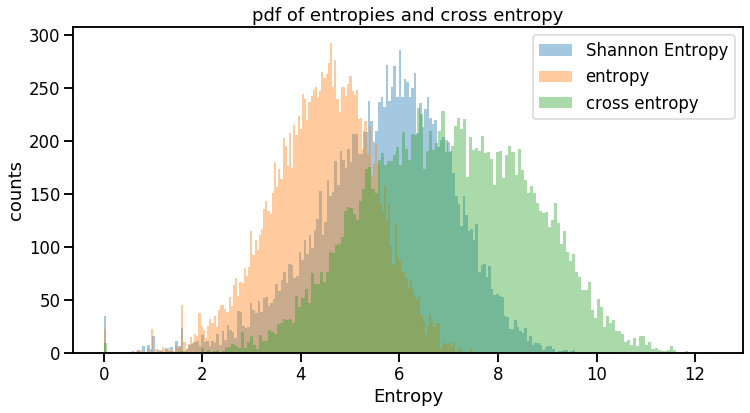

In [21]:
fig, ax = plt.subplots(figsize = (12,6))
sns.set_context('talk')
sns.distplot(user_details['ShannonEntropy'], label='Shannon Entropy', kde=False, bins=200)
sns.distplot(user_details['entropy'], label = 'entropy',  kde=False, bins=200)
sns.distplot(user_details['alters entropy'], label='cross entropy',  kde=False, bins=200)
plt.title('pdf of entropies and cross entropy')
ax.set(xlabel='Entropy', ylabel='counts')
ax.legend()
plt.show()

## Distributions of predictabilities

PS: Maybe incorrect because I'm still thinking what does mean of negative predictability

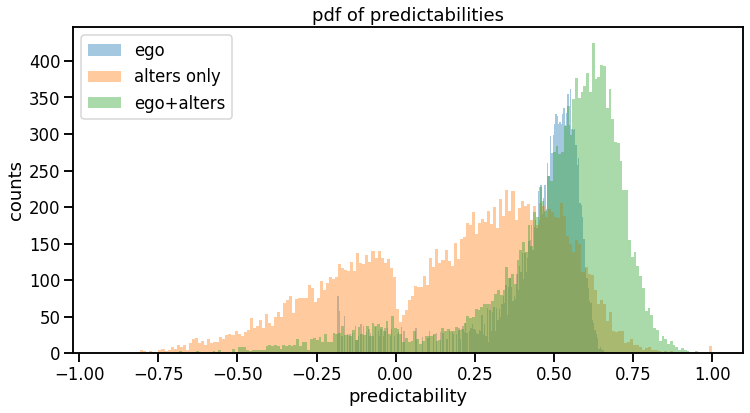

In [18]:
fig, ax = plt.subplots(figsize = (12,6))
sns.set_context('talk')
sns.distplot(user_details['ego predictability'], label='ego', bins = 200, kde=False)
sns.distplot(user_details['alters predictability'], label='alters only', bins=200, kde=False)
sns.distplot(user_details['ego+alters predictability'], label = 'ego+alters', bins=200, kde=False)
plt.title('pdf of predictabilities')
ax.set(xlabel='predictability', ylabel='counts')
ax.legend()
plt.show()

## Entropies and predictabilities compare

In [32]:
CCE = pd.melt(user_details, id_vars=['NumFriends'], value_vars=['ego+alters entropy','alters entropy'], \
                  var_name = 'entropy')

Text(0.5, 1.0, 'Different entropies for partial dataset (Alters < 40)')

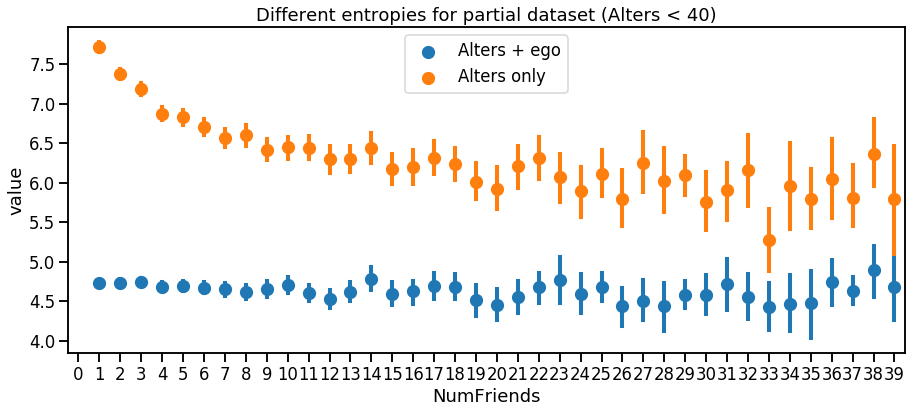

In [33]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.set_context("talk")
sns.pointplot(x="NumFriends", y="value", hue='entropy', data=CCE[CCE['NumFriends'] < 40], \
              ci=95, join=False, ax=ax)
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Alters + ego', 'Alters only'], loc=9)
plt.title('Different entropies for partial dataset (Alters < 40)')

In [43]:
baseline = user_details[user_details['NumFriends'] ==0]['ego predictability'].mean()

In [40]:
CCE_pred = pd.melt(user_details, id_vars=['NumFriends'], value_vars=['ego+alters predictability','alters predictability'], \
                  var_name = 'entropy')
CCE_pred

,NumFriends,entropy,value
0,6,ego+alters predictability,0.661459
1,4,ego+alters predictability,0.562125
2,4,ego+alters predictability,0.767017
3,7,ego+alters predictability,0.519611
4,7,ego+alters predictability,0.607075
...,...,...,...
31581,4,alters predictability,0.368566
31582,11,alters predictability,0.120457
31583,2,alters predictability,-0.050938
31584,3,alters predictability,0.264994


Text(0.5, 1.0, 'Different predictabilities for partial dataset (Alters < 40)')

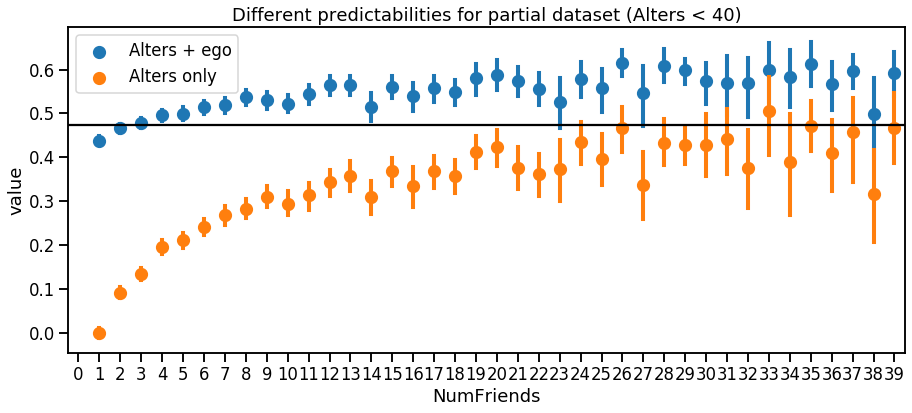

In [48]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.set_context("talk")
sns.pointplot(x="NumFriends", y="value", hue='entropy', data=CCE_pred[CCE_pred['NumFriends'] < 40], \
              ci=95, join=False, ax=ax)
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['Alters + ego', 'Alters only'])
ax.axhline(y=baseline, color='black')

plt.title('Different predictabilities for partial dataset (Alters < 40)')

## Baisc statistics for number of friends, average alters for a ego is 7.22

In [22]:
user_details['NumFriends'].describe()

count    15793.000000
mean         7.225416
std         15.002240
min          0.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        821.000000
Name: NumFriends, dtype: float64

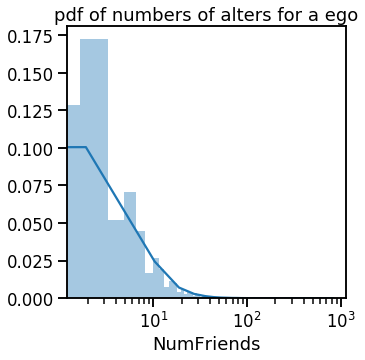

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.distplot(user_details['NumFriends'], bins=500)
ax.set_xscale('log')
plt.title('pdf of numbers of alters for a ego')
plt.show()

## Baisc statistics for number of placeid (average 466.64) and unique placeid (average 167)

In [93]:
user_details['NumPlaceid'].describe()

count    15793.000000
mean       466.644209
std        509.988549
min          1.000000
25%        138.000000
50%        316.000000
75%        621.000000
max       7338.000000
Name: NumPlaceid, dtype: float64

In [94]:
user_details['NumUniqPlaceid'].describe()

count    15793.000000
mean       167.005572
std        154.044074
min          1.000000
25%         62.000000
50%        125.000000
75%        226.000000
max       2470.000000
Name: NumUniqPlaceid, dtype: float64

In [174]:
# SMALL_SIZE = 15
# MEDIUM_SIZE = 20
# BIGGER_SIZE = 25

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## The number of friends (alters) VS entropy and predictability

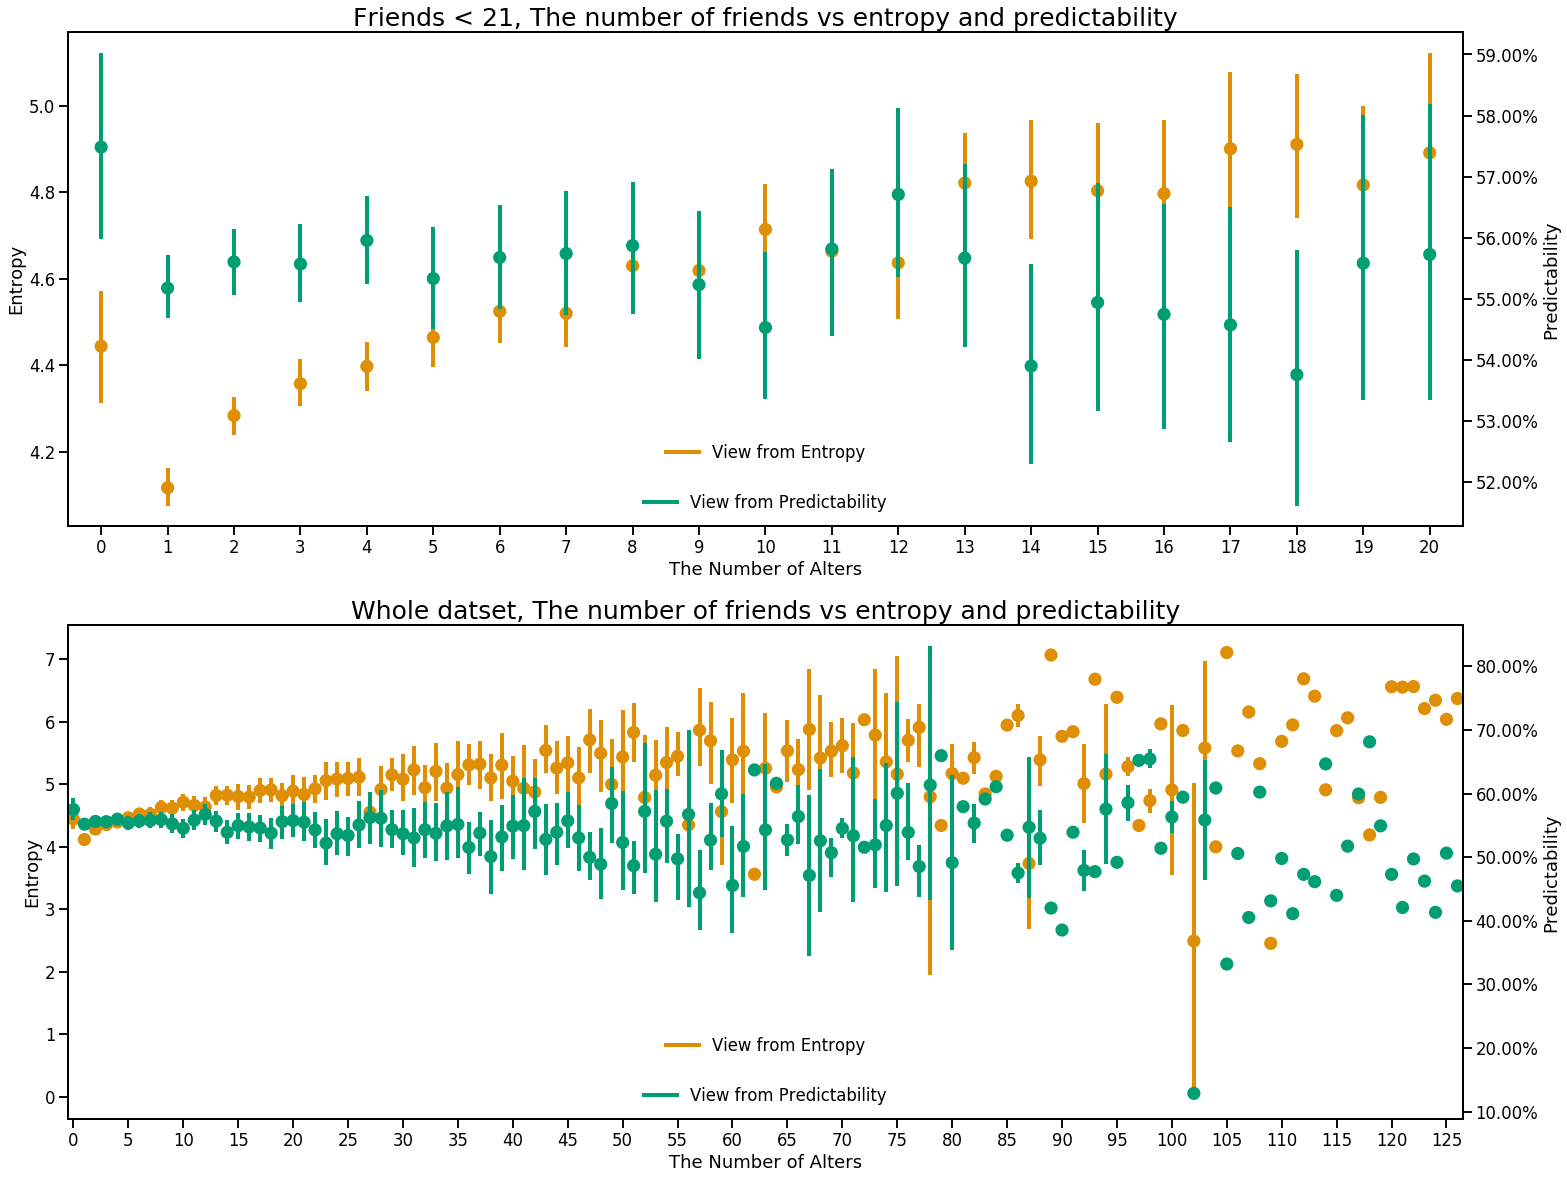

In [43]:
fig, [ax, ax3] = plt.subplots(2,1, figsize=(25, 20))
sns.set_context("talk")
sns.pointplot(x="NumFriends", y="LZ_entropy", data=user_details[user_details['NumFriends'] < 21], \
              ci=95, join=False, ax=ax, color=palette[1])
ax.legend(labels=['View from Entropy'], bbox_to_anchor=(0., .1, 1., .1), loc=8, frameon=False)
ax.set(xlabel='The Number of Alters', ylabel='Entropy')

ax2 = ax.twinx()
sns.pointplot(x="NumFriends", y="Predictability2", data=user_details[user_details['NumFriends'] < 21], \
              ci=95, join=False, ax=ax2, color=palette[2])
ax2.legend(labels=['View from Predictability'], bbox_to_anchor=(0., 0, 1., .1), loc=8, frameon=False)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax2.set(xlabel='The Number of Alters', ylabel='Predictability')

plt.title('Friends < 21, The number of friends vs entropy and predictability', fontsize=25)

sns.pointplot(x="NumFriends", y="LZ_entropy", data=user_details, \
              ci=95, join=False, ax=ax3, color=palette[1])
ax3.set(xlabel='The Number of Alters', ylabel='Entropy')
ax3.legend(labels=['View from Entropy'], bbox_to_anchor=(0., .1, 1., .1), loc=8, frameon=False)

ax4 = ax3.twinx()
sns.pointplot(x="NumFriends", y="Predictability2", data=user_details, \
              ci=95, join=False, ax=ax4, color=palette[2])
ax4.legend(labels=['View from Predictability'], bbox_to_anchor=(0., 0, 1., .1), loc=8, frameon=False)

vals = ax4.get_yticks()
ax4.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax4.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax4.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax4.set(xlabel='The Number of Alters', ylabel='Predictability')

plt.title('Whole datset, The number of friends vs entropy and predictability', fontsize=25)
plt.show()

## The number of friends (alters) VS cumulative cross entropy and predictability (estimated by cumulative cross entropy)

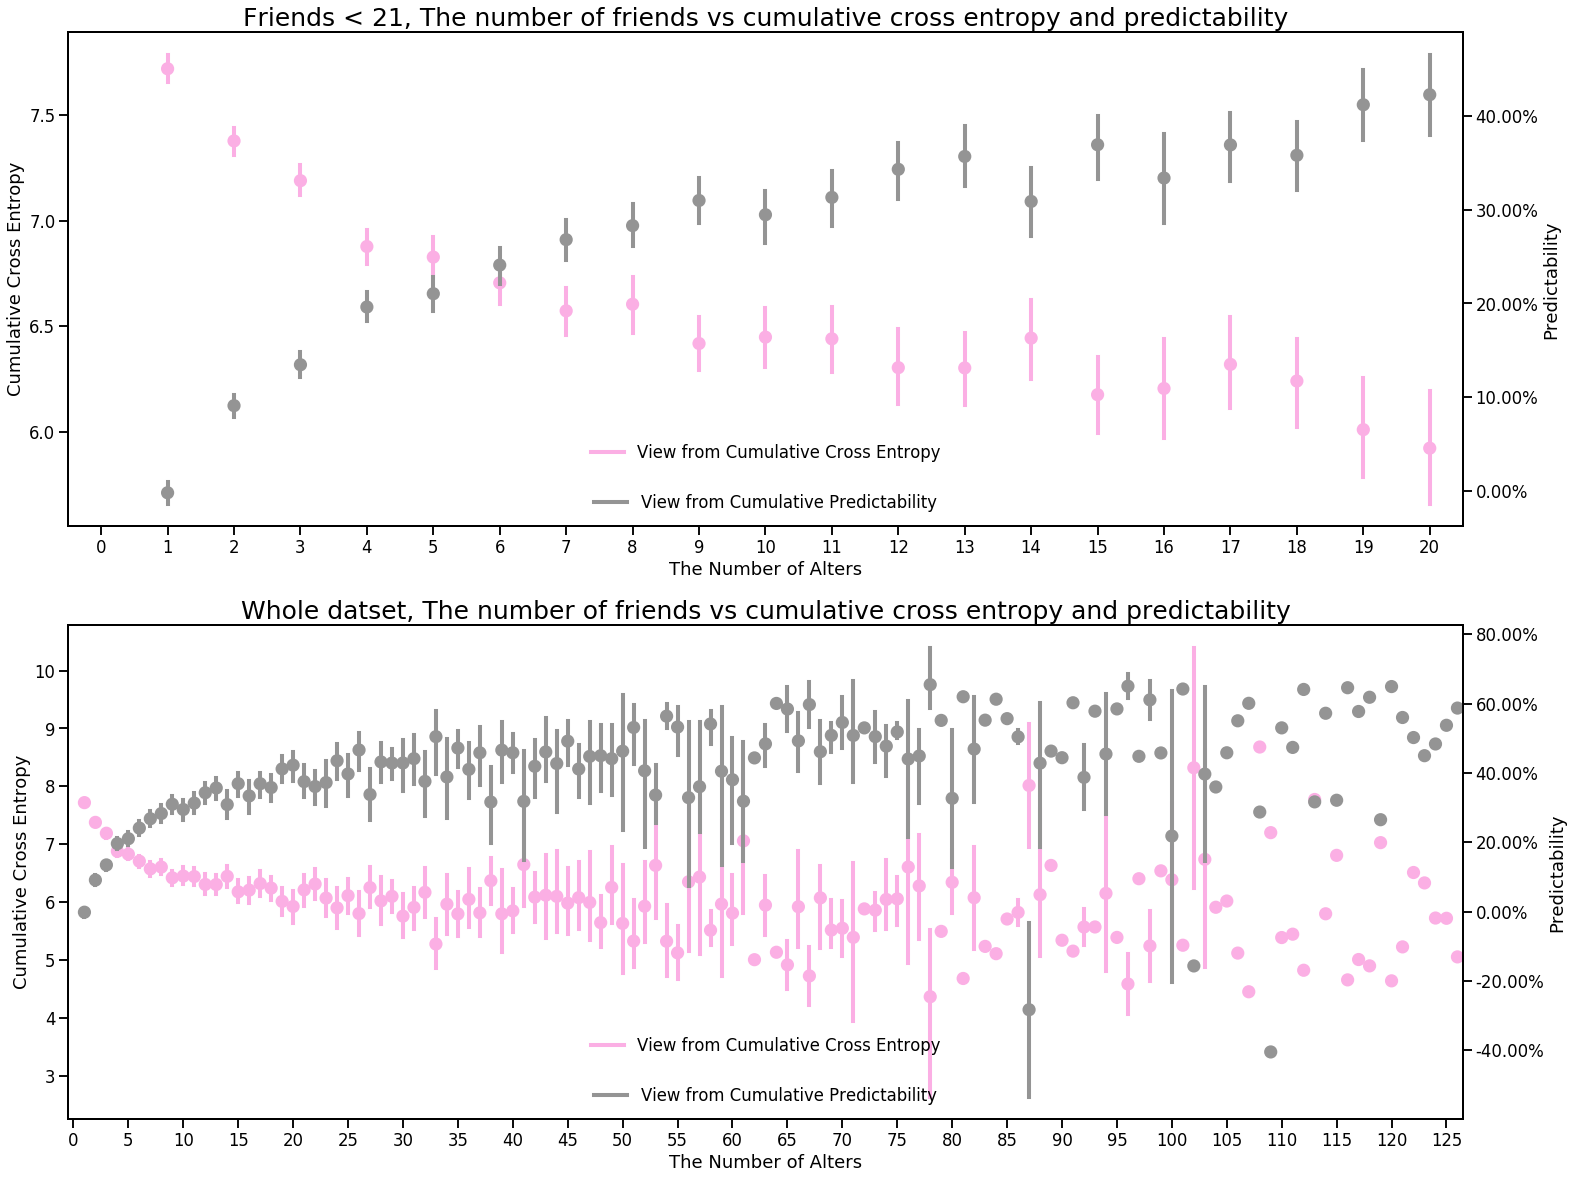

In [48]:
fig, [ax, ax3] = plt.subplots(2,1, figsize=(25, 20))
sns.set_context("talk")
sns.pointplot(x="NumFriends", y="CrossEntropy", data=user_details[user_details['NumFriends'] < 21], \
              ci=95, join=False, ax=ax, color=palette[6])
ax.legend(labels=['View from Cumulative Cross Entropy'], bbox_to_anchor=(0., .1, 1., .1), loc=8, frameon=False)
ax.set(xlabel='The Number of Alters', ylabel='Cumulative Cross Entropy')

ax2 = ax.twinx()
sns.pointplot(x="NumFriends", y="CrossPredictability2", data=user_details[user_details['NumFriends'] < 21], \
              ci=95, join=False, ax=ax2, color=palette[7])
ax2.legend(labels=['View from Cumulative Predictability'], bbox_to_anchor=(0., 0, 1., .1), loc=8, frameon=False)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax2.set(xlabel='The Number of Alters', ylabel='Predictability')

plt.title('Friends < 21, The number of friends vs cumulative cross entropy and predictability', fontsize=25)

sns.pointplot(x="NumFriends", y="CrossEntropy", data=user_details, \
              ci=95, join=False, ax=ax3, color=palette[6])
ax3.set(xlabel='The Number of Alters', ylabel='Cumulative Cross Entropy')
ax3.legend(labels=['View from Cumulative Cross Entropy'], bbox_to_anchor=(0., .1, 1., .1), loc=8, frameon=False)

ax4 = ax3.twinx()
sns.pointplot(x="NumFriends", y="CrossPredictability2", data=user_details, \
              ci=95, join=False, ax=ax4, color=palette[7])
ax4.legend(labels=['View from Cumulative Predictability'], bbox_to_anchor=(0., 0, 1., .1), loc=8, frameon=False)

vals = ax4.get_yticks()
ax4.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax4.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax4.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax4.set(xlabel='The Number of Alters', ylabel='Predictability')

plt.title('Whole datset, The number of friends vs cumulative cross entropy and predictability', fontsize=25)
plt.show()

## The number of Unique Placeid VS entropy and predictability

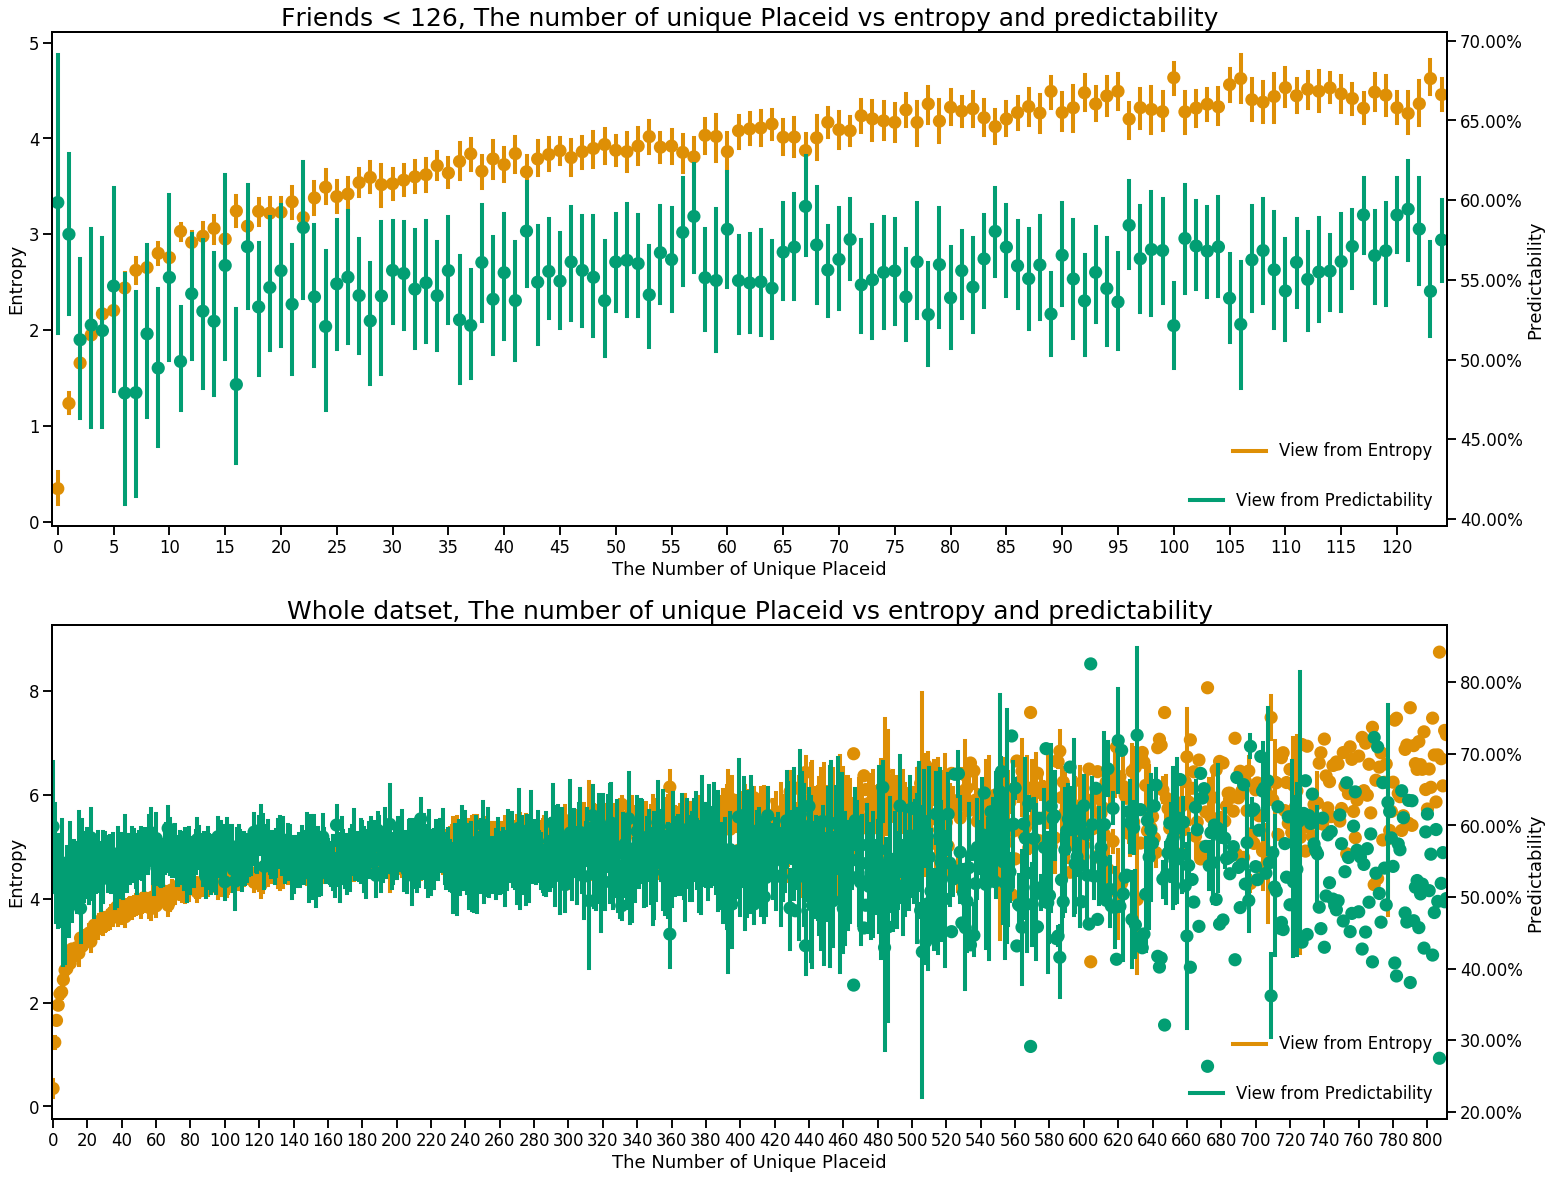

In [60]:
fig, [ax, ax3] = plt.subplots(2,1, figsize=(25, 20))
sns.set_context("talk")
sns.pointplot(x="NumUniqPlaceid", y="LZ_entropy", data=user_details[user_details['NumUniqPlaceid'] < 126], \
              ci=95, join=False, ax=ax, color=palette[1])
ax.legend(labels=['View from Entropy'], bbox_to_anchor=(0., .1, 1., .1), loc=1, frameon=False)
ax.set(xlabel='The Number of Unique Placeid', ylabel='Entropy')

ax2 = ax.twinx()
sns.pointplot(x="NumUniqPlaceid", y="Predictability2", data=user_details[user_details['NumUniqPlaceid'] < 126], \
              ci=95, join=False, ax=ax2, color=palette[2])
ax2.legend(labels=['View from Predictability'], bbox_to_anchor=(0., 0, 1., .1), loc=1, frameon=False)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax2.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax2.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax2.set(xlabel='The Number of Unique Placeid', ylabel='Predictability')

plt.title('Friends < 126, The number of unique Placeid vs entropy and predictability', fontsize=25)

sns.pointplot(x="NumUniqPlaceid", y="LZ_entropy", data=user_details, \
              ci=95, join=False, ax=ax3, color=palette[1])
ax3.set(xlabel='The Number of Unique Placeid', ylabel='Entropy')
ax3.legend(labels=['View from Entropy'], bbox_to_anchor=(0., .1, 1., .1), loc=1, frameon=False)

ax4 = ax3.twinx()
sns.pointplot(x="NumUniqPlaceid", y="Predictability2", data=user_details, \
              ci=95, join=False, ax=ax4, color=palette[2])
ax4.legend(labels=['View from Predictability'], bbox_to_anchor=(0., 0, 1., .1), loc=1, frameon=False)

vals = ax4.get_yticks()
ax4.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax4.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax4.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax4.set(xlabel='The Number of Unique Placeid', ylabel='Predictability')

plt.title('Whole datset, The number of unique Placeid vs entropy and predictability', fontsize=25)
plt.show()

## The number of Unique Placeid VS cumulative cross entropy and predictability (estimated by cumulative cross entropy)

PS: This section may not correct because I'm still thinking what does mean of negative predictability

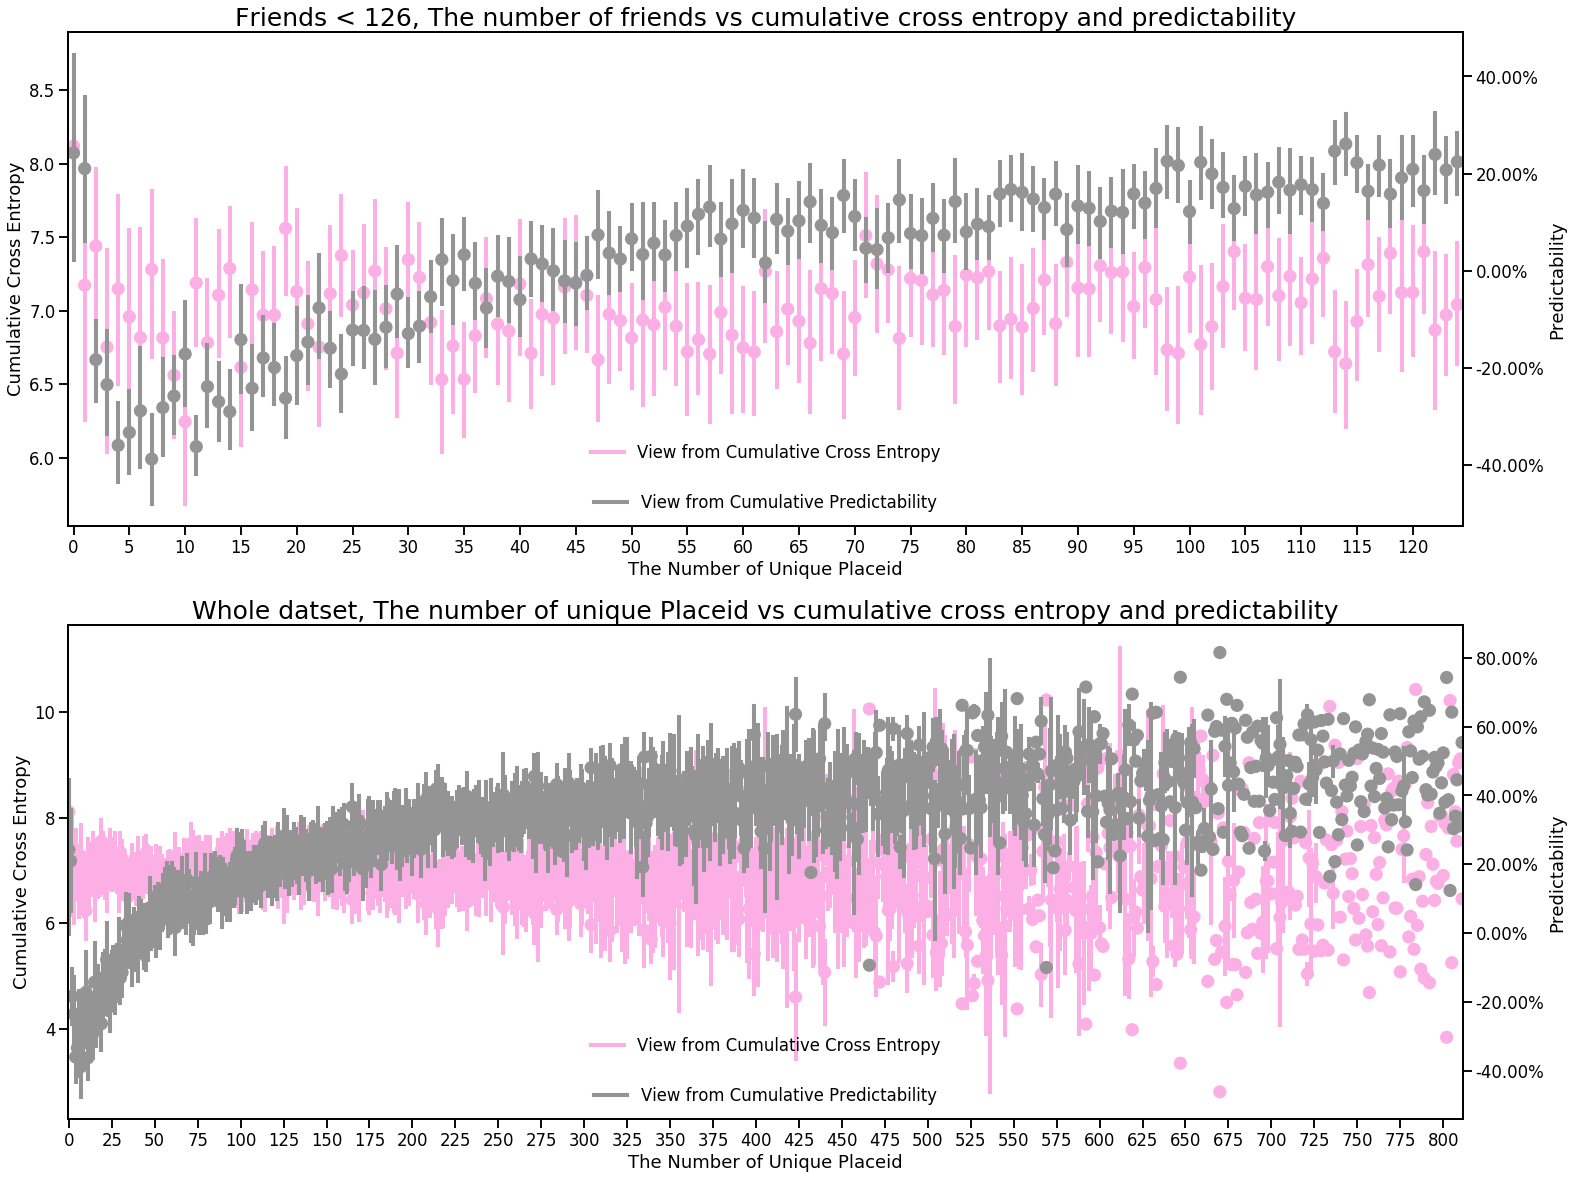

In [57]:
fig, [ax, ax3] = plt.subplots(2,1, figsize=(25, 20))
sns.set_context("talk")
sns.pointplot(x="NumUniqPlaceid", y="CrossEntropy", data=user_details[user_details['NumUniqPlaceid'] < 126], \
              ci=95, join=False, ax=ax, color=palette[6])
ax.legend(labels=['View from Cumulative Cross Entropy'], bbox_to_anchor=(0., .1, 1., .1), loc=8, frameon=False)
ax.set(xlabel='The Number of Unique Placeid', ylabel='Cumulative Cross Entropy')

ax2 = ax.twinx()
sns.pointplot(x="NumUniqPlaceid", y="CrossPredictability2", data=user_details[user_details['NumUniqPlaceid'] < 126], \
              ci=95, join=False, ax=ax2, color=palette[7])
ax2.legend(labels=['View from Cumulative Predictability'], bbox_to_anchor=(0., 0, 1., .1), loc=8, frameon=False)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax2.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax2.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax2.set(xlabel='The Number of Unique Placeid', ylabel='Predictability')

plt.title('Friends < 126, The number of friends vs cumulative cross entropy and predictability', fontsize=25)

sns.pointplot(x="NumUniqPlaceid", y="CrossEntropy", data=user_details, \
              ci=95, join=False, ax=ax3, color=palette[6])
ax3.set(xlabel='The Number of Unique Placeid', ylabel='Cumulative Cross Entropy')
ax3.legend(labels=['View from Cumulative Cross Entropy'], bbox_to_anchor=(0., .1, 1., .1), loc=8, frameon=False)

ax4 = ax3.twinx()
sns.pointplot(x="NumUniqPlaceid", y="CrossPredictability2", data=user_details, \
              ci=95, join=False, ax=ax4, color=palette[7])
ax4.legend(labels=['View from Cumulative Predictability'], bbox_to_anchor=(0., 0, 1., .1), loc=8, frameon=False)

vals = ax4.get_yticks()
ax4.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax4.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax4.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax4.set(xlabel='The Number of Unique Placeid', ylabel='Predictability')

plt.title('Whole datset, The number of unique Placeid vs cumulative cross entropy and predictability', fontsize=25)
plt.show()

## The number of friends (alters) VS entropy and cumulative cross entropy

In [113]:
SLC_melt = pd.melt(user_details, id_vars=['NumFriends'], value_vars=['ShannonEntropy', 'LZ_entropy', 'CrossEntropy'], \
                  var_name = 'entropy')
SLC_melt

,NumFriends,entropy,value
0,3,ShannonEntropy,5.658225
1,8,ShannonEntropy,5.924540
2,2,ShannonEntropy,5.140111
3,12,ShannonEntropy,3.544559
4,2,ShannonEntropy,6.238941
...,...,...,...
47374,1,CrossEntropy,8.434628
47375,3,CrossEntropy,7.175223
47376,3,CrossEntropy,9.082121
47377,1,CrossEntropy,10.350105


Text(0.5, 1.0, 'Different entropies for partial dataset (Alters < 21)')

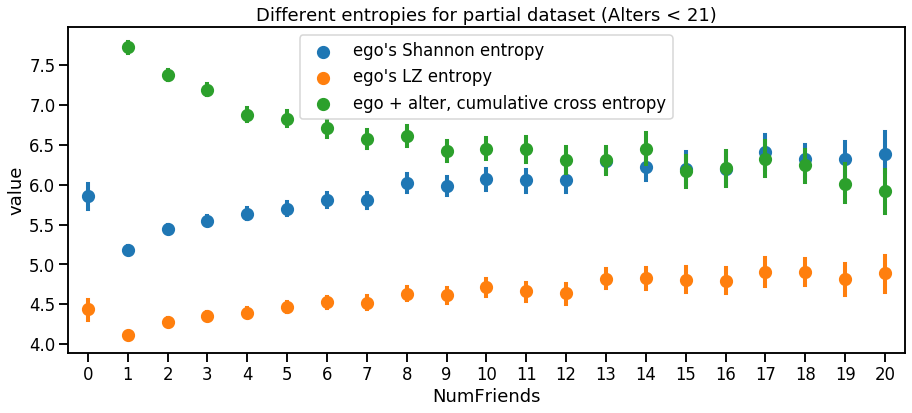

In [130]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.set_context("talk")
sns.pointplot(x="NumFriends", y="value", hue='entropy', data=SLC_melt[SLC_melt['NumFriends'] < 21], \
              ci=95, join=False, ax=ax)
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['ego\'s Shannon entropy' , 'ego\'s LZ entropy', 'ego + alter, cumulative cross entropy'], loc=9)
plt.title('Different entropies for partial dataset (Alters < 21)')

Text(0.5, 1.0, 'Different entropies for partial dataset (Whole dataset)')

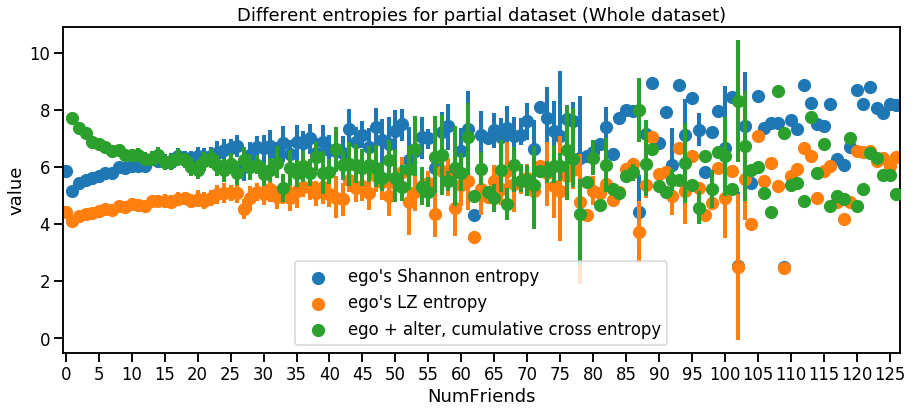

In [131]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.set_context("talk")
sns.pointplot(x="NumFriends", y="value", hue='entropy', data=SLC_melt, \
              ci=95, join=False, ax=ax)
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['ego\'s Shannon entropy' , 'ego\'s LZ entropy', 'ego + alter, cumulative cross entropy'], loc=8)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.title('Different entropies for partial dataset (Whole dataset)')

## The number of unique placeid vs entropy and cumulative cross entropy

Text(0.5, 1.0, 'Different entropies for partial dataset (unique placeid < 200)')

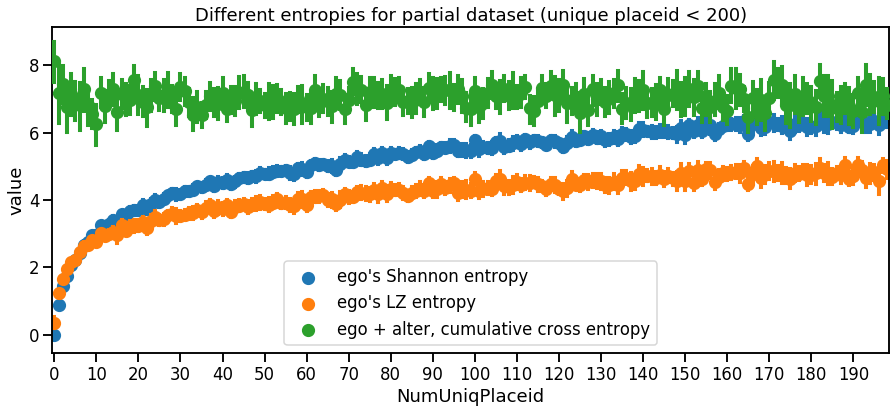

In [137]:
uniq_pl_melt = pd.melt(user_details, id_vars=['NumUniqPlaceid'], value_vars=['ShannonEntropy', 'LZ_entropy', 'CrossEntropy'], \
                  var_name = 'entropy')

fig, ax = plt.subplots(figsize=(15, 6))
sns.set_context("talk")
sns.pointplot(x="NumUniqPlaceid", y="value", hue='entropy', data=uniq_pl_melt[uniq_pl_melt['NumUniqPlaceid'] < 200], \
              ci=95, join=False, ax=ax)
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['ego\'s Shannon entropy' , 'ego\'s LZ entropy', 'ego + alter, cumulative cross entropy'], loc=8)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.title('Different entropies for partial dataset (unique placeid < 200)')

Text(0.5, 1.0, 'Different entropies for partial dataset (whole dataset)')

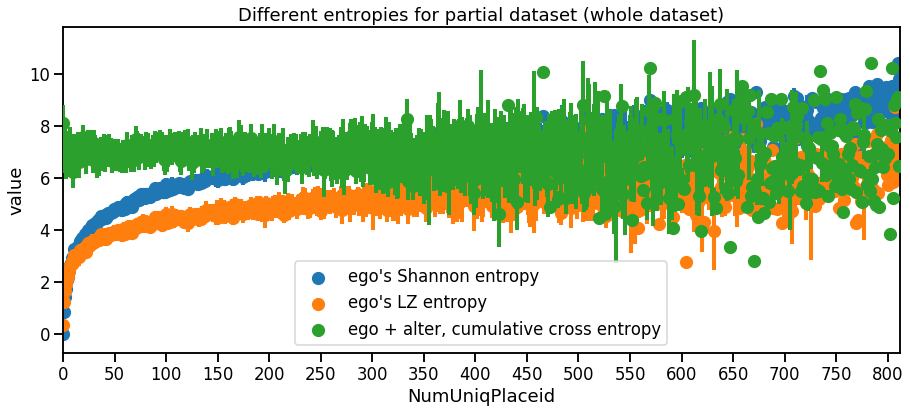

In [139]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.set_context("talk")
sns.pointplot(x="NumUniqPlaceid", y="value", hue='entropy', data=uniq_pl_melt, \
              ci=95, join=False, ax=ax)
leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['ego\'s Shannon entropy' , 'ego\'s LZ entropy', 'ego + alter, cumulative cross entropy'], loc=8)
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.title('Different entropies for partial dataset (whole dataset)')

## Entropy vs Predictability along with number of friend, placeid and unique placeid

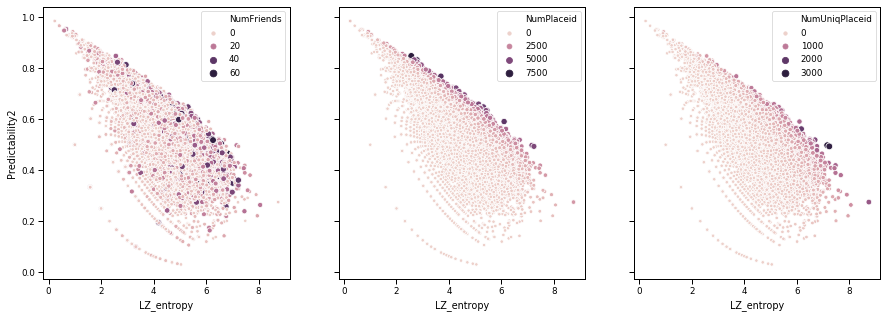

In [96]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(15, 5), sharey=True)
sns.set_context("paper")
sns.scatterplot(x="LZ_entropy", y="Predictability2", data=user_details[user_details['NumFriends'] < 50], \
           hue="NumFriends", size="NumFriends", ax=ax1)
sns.scatterplot(x="LZ_entropy", y="Predictability2", data=user_details[user_details['NumFriends'] < 50], \
           hue="NumPlaceid", size="NumPlaceid", ax=ax2)
sns.scatterplot(x="LZ_entropy", y="Predictability2", data=user_details[user_details['NumFriends'] < 50], \
           hue="NumUniqPlaceid", size="NumUniqPlaceid", ax=ax3)
plt.show()

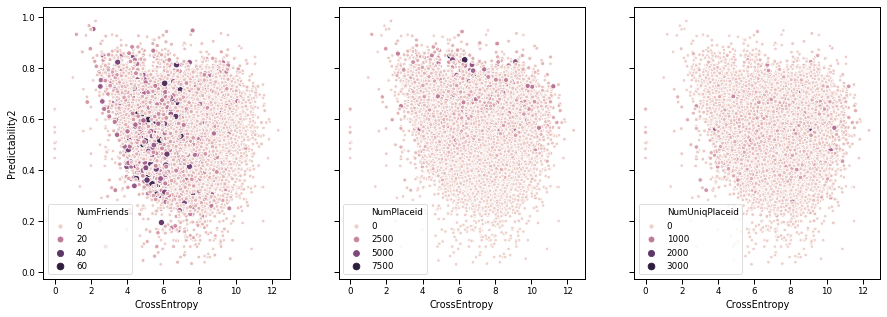

In [97]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(15, 5), sharey=True)
sns.set_context("paper")
sns.scatterplot(x="CrossEntropy", y="Predictability2", data=user_details[user_details['NumFriends'] < 50], \
           hue="NumFriends", size="NumFriends", ax=ax1)
sns.scatterplot(x="CrossEntropy", y="Predictability2", data=user_details[user_details['NumFriends'] < 50], \
           hue="NumPlaceid", size="NumPlaceid", ax=ax2)
sns.scatterplot(x="CrossEntropy", y="Predictability2", data=user_details[user_details['NumFriends'] < 50], \
           hue="NumUniqPlaceid", size="NumUniqPlaceid", ax=ax3)
plt.show()